https://drive.google.com/drive/folders/1Zg4yCJoLDOlxj5LqzkG_uWaCGZb8cBT6?usp=sharing  link to the docs....

In [ ]:
from google.colab import files  #place your kaggle.json file here
my_file=files.upload()

Saving kaggle.json to kaggle.json


setting up the required environment variables,importing the necessary libraries and ignoring the unnecessary warnings that need to be dealed with

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
import os
import pandas as pd
import warnings
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]
warnings.filterwarnings("ignore")


since prediction would require the images from test data and we do not have any such folder,so we have to download our dataset again for the same.

In [ ]:
!kaggle datasets download -d mridul18/pokedex  #downloading the dataset from kaggle through my profile

100% 512M/513M [00:17<00:00, 34.5MB/s]
100% 513M/513M [00:17<00:00, 30.1MB/s]


In [ ]:
!unzip "*.zip" #unzipping the data for further predictions

Streaming output truncated to the last 5000 lines.
  inflating: test_data/img (2063).jpg  
  inflating: test_data/img (2064).jpg  
  inflating: test_data/img (2066).jpg  
  inflating: test_data/img (2067).jpg  
  inflating: test_data/img (2068).jpg  
  inflating: test_data/img (2069).jpg  
  inflating: test_data/img (207).jpg  
  inflating: test_data/img (2070).jpg  
  inflating: test_data/img (2071).jpg  
  inflating: test_data/img (2072).jpg  
  inflating: test_data/img (2073).jpg  
  inflating: test_data/img (2075).jpg  
  inflating: test_data/img (2076).jpg  
  inflating: test_data/img (2077).jpg  
  inflating: test_data/img (2078).jpg  
  inflating: test_data/img (2079).jpg  
  inflating: test_data/img (208).jpg  
  inflating: test_data/img (2080).jpg  
  inflating: test_data/img (2081).jpg  
  inflating: test_data/img (2083).jpg  
  inflating: test_data/img (2084).jpg  
  inflating: test_data/img (2085).jpg  
  inflating: test_data/img (2086).jpg  
  inflating: test_data/img (208

---

mounting the drive so that we can continue the process of predictions from out .pth and .pkl files.This makes our task easy and hence we do not have train our model again and again

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
my_dir="/content/drive/My Drive/dl_projects/PokeDex"

In [ ]:
predictor = load_learner(my_dir)

A function that takes in image as an argument and returns the specific class of that particular pokemon by making trained predictions at it's end.

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

In [ ]:
all_test_images=os.listdir("test_data")#storing all directories in a list named all_test_images

we can predict the total number of images at a specific index by just changing the **idx** value.Our test_data folder contains 6086 files so index provided anywhere between would be correctly predicted.

Beedrill


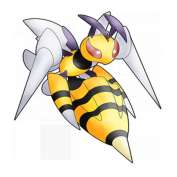

In [ ]:
idx=600
print(my_predictor("test_data/"+all_test_images[idx]))
img = open_image("test_data/"+all_test_images[idx])
img.show()

following commands are basically for predicting each image present in the test data and presenting it's output at top left corner for each image.After execution all images will be stored inside a folder named test_result.

In [ ]:
import cv2
test_files=os.listdir("test_data")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

finally making a resultant video for our test_result folder

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 360x360  \-c:v libx264 -r 0.25 -pix_fmt yuv422p ../pokedex.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 -

for hosting the vedio publicly on a specific URL

In [ ]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.23)


In [ ]:
url = upload_public('pokedex.mp4')

In [ ]:
url

'https://drive.google.com/uc?id=10vGX_F0LYRMbNNpGb_0KRcCE7cyFsn6J'